# Term Deposit Prediction

- EDA analysis of variables in the raw dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn

/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


- Importing the dataset

In [172]:
df = pd.read_csv('../data/term-deposit-marketing-2020.csv')

- Checking the shape of the dataframe

In [144]:
df.shape

(40000, 14)

- Checking dataframe structure

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


- Checking the beginning of the dataframe

In [146]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


- Checking for missing values

In [147]:
df.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
39998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [148]:
null_values = df.isna().sum(axis=0)
null_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

### Identifying skillness and distribution (Outlier Treatment)

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
print(df.describe())

                age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000


In [151]:
# cols = ['y', 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign']

# for i in range(0,len(cols),2):
#        plt.figure(figsize=(12,6))
#        plt.subplot(121)
#        plt.xticks(rotation = 45)
#        sns.countplot(df[cols[i]])
#        plt.subplot(122)
#        plt.xticks(rotation = 45)
#        sns.countplot(df[cols[i+1]])
#        plt.tight_layout()
#        plt.show()

In [152]:
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object


In [173]:
# Perform onehot encoding but in a new dataframe, so imputations later can be performed on the unknowns
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original dataframe
df_encoded = df.copy()

# Define columns to be label encoded
columns_to_encode = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_encode:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

# Display the head of the new DataFrame to check the changes
print(df_encoded.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  y  
0    5      8       261         1  0  
1    5      8       151         1  0  
2    5      8        76         1  0  
3    5      8        92         1  0  
4    5      8       198         1  0  


In [154]:
df_encoded.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,4.266050,1.154100,1.199950,0.020225,1274.277550,0.600775,0.173250,0.696275,16.017225,5.509525,254.824300,2.882175,0.072400
std,9.641776,3.291229,0.605485,0.741643,0.140771,2903.769716,0.489745,0.378468,0.921817,8.278127,2.909522,259.366498,3.239051,0.259152
min,19.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,54.000000,0.000000,0.000000,0.000000,8.000000,3.000000,100.000000,1.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,407.000000,1.000000,0.000000,0.000000,17.000000,6.000000,175.000000,2.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1319.000000,1.000000,0.000000,2.000000,21.000000,8.000000,313.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,10.000000,4918.000000,63.000000,1.000000


In [155]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


<AxesSubplot:>

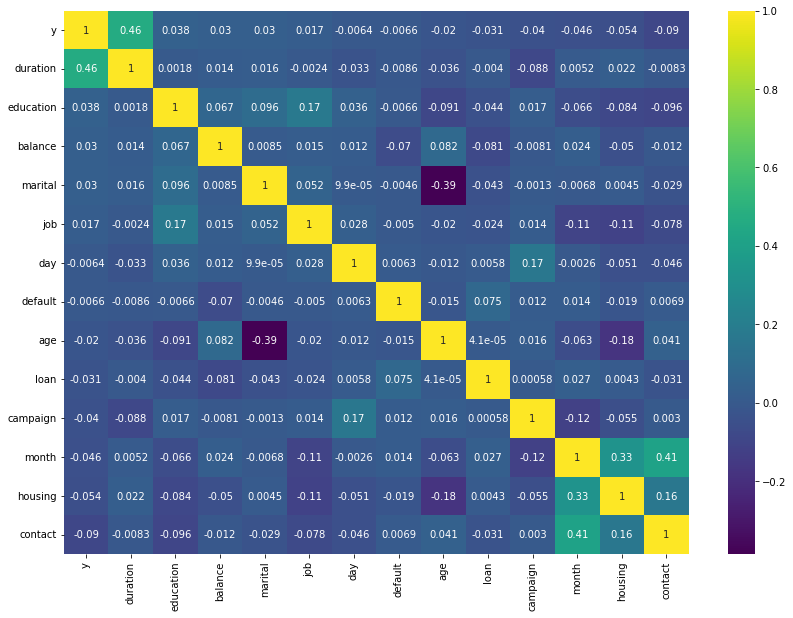

In [156]:
k = 14
cols = df_encoded.corr().nlargest(k, 'y')['y'].index
cm = df_encoded[cols].corr()
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [178]:
label = df_encoded.loc[:, ['y']]

In [179]:
features = df_encoded.drop('y', axis=1)

# Prediction as is:

In [3]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [162]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [163]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.6161490683229813 and Testing Score is 0.4548162859980138


In [164]:
y_pred = model.predict(X_test)

In [165]:
confusion_matrix(y_test, y_pred)

array([[7222,  203],
       [ 346,  229]])

In [166]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [5.10995084e-02 2.21644259e-02 1.19552986e-02 6.54305014e-03
 4.37737902e-04 5.48726270e-02 2.67831625e-02 4.77650447e-03
 2.74831377e-02 8.41243172e-02 8.09970169e-02 6.09568670e-01
 1.91945431e-02]


# Imputation Methods

FYI after going through all the imputation methods tried below: The variables I am trying to impute the unknowns are variables that have very low correlation with the label. Thus, given that predictions didn't improve after all, then it might be better to remove these variables from the prediction.

Here are the potential methods I considered, but used the first three to get a glance of how this would work:
* Mode imputation
* KNN imputation
* Machine learning prediction
* MICE imputation - multivariate imputation by chained equations
* Deep Learning

1) **Mode imputation:**

In [167]:
# Perform mode imputation
categorical_columns = ['job', 'education', 'contact']

for column in categorical_columns:
    # Compute the mode of the column excluding "unknown"
    mode_val = df[df[column] != "unknown"][column].mode()[0]
    
    # Replace "unknown" values with the mode value in the column
    df[column].replace("unknown", mode_val, inplace=True)

In [168]:
# Perform onehot encoding but in a new dataframe
df_mode = df.copy()

# Define columns to be label encoded
columns_to_encode = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_encode:
    encoder = LabelEncoder()
    df_mode[col] = encoder.fit_transform(df_mode[col])

# Display the head of the new DataFrame to check the changes
print(df_mode.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        0   
1   44    9        2          1        0       29        1     0        0   
2   33    2        1          1        0        2        1     1        0   
3   47    1        1          1        0     1506        1     0        0   
4   33    1        2          1        0        1        0     0        0   

   day  month  duration  campaign  y  
0    5      8       261         1  0  
1    5      8       151         1  0  
2    5      8        76         1  0  
3    5      8        92         1  0  
4    5      8       198         1  0  


In [169]:
label = df_mode.loc[:, ['y']]
features = df_mode.drop('y', axis=1)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [172]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [173]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.5672358591248666 and Testing Score is 0.39190628328008514


In [174]:
y_pred = model.predict(X_test)

In [175]:
confusion_matrix(y_test, y_pred)

array([[7245,  180],
       [ 391,  184]])

In [176]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.07045491 0.02028575 0.01234681 0.00530421 0.         0.06115672
 0.03262791 0.00172867 0.00398362 0.07064921 0.06847937 0.64093795
 0.01204486]


2) **K-Nearest Neighbor (KNN) inputation**

In [177]:
# Create a copy of the dataframe
df_knn = df.copy()

# Define columns to be label encoded
columns_to_encode = ['y', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_encode:
    encoder = LabelEncoder()
    df_knn[col] = encoder.fit_transform(df_knn[col])

In [178]:
from sklearn.impute import KNNImputer
for col in columns_to_encode:
    encoder = LabelEncoder()
    df_knn[col] = encoder.fit_transform(df_knn[col])

# Convert "unknown" to NaN for the KNN imputer
df_knn[categorical_columns] = df_knn[categorical_columns].replace("unknown", np.nan)

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Apply imputation
df_knn[categorical_columns] = imputer.fit_transform(df_knn[categorical_columns])

# Convert the imputed columns back to int type (as KNNImputer returns float values)
for col in categorical_columns:
    df_knn[col] = df_knn[col].astype(int)

# Display the head of the new DataFrame to check the changes
print(df_knn.head())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        0   
1   44    9        2          1        0       29        1     0        0   
2   33    2        1          1        0        2        1     1        0   
3   47    1        1          1        0     1506        1     0        0   
4   33    1        2          1        0        1        0     0        0   

   day  month  duration  campaign  y  
0    5      8       261         1  0  
1    5      8       151         1  0  
2    5      8        76         1  0  
3    5      8        92         1  0  
4    5      8       198         1  0  


In [179]:
df_knn.isna().sum(axis=0)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [180]:
label = df_knn.loc[:, ['y']]
features = df_knn.drop('y', axis=1)

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [183]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [184]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.5666221628838451 and Testing Score is 0.3936170212765958


In [185]:
y_pred = model.predict(X_test)

In [186]:
confusion_matrix(y_test, y_pred)

array([[7245,  180],
       [ 390,  185]])

In [187]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.07218058 0.02078921 0.01234813 0.00530477 0.         0.06074379
 0.03089903 0.00245878 0.00398405 0.07050003 0.06827064 0.64020296
 0.01231803]


3) **Machine Learning prediction**

In [198]:
label = df.loc[:, ['y']]
features = df.drop('y', axis=1)

In [199]:
# Apply OHE to label
from sklearn.preprocessing import LabelEncoder
for col in columns_to_encode:
    encoder = LabelEncoder()
    label['y'] = encoder.fit_transform(label['y'])

In [200]:
df_predict = features.copy()

In [201]:
# Create new_df_features and the separate target DataFrames
new_df_features = df_predict.drop(columns=['job', 'education', 'contact'])
job_df = df_predict[['job']]
education_df = df_predict[['education']]
contact_df = df_predict[['contact']]

def encode_features(features_df):
    encoders = {}  # Store encoders for potential reverse encoding
    for column in features_df.columns:
        # Check if the column is of object type (indicative of a categorical variable)
        if features_df[column].dtype == 'object':
            le = LabelEncoder()
            non_nan_values = features_df[column].dropna()
            le.fit(non_nan_values)
            encoders[column] = le  # Store the trained encoder
            
            # Only transform the non-NaN values
            features_df.loc[non_nan_values.index, column] = le.transform(non_nan_values)
            
    return features_df, encoders

def impute_missing_values(features, target_df, target_col):
    # Ensure all features are encoded
    features, encoders = encode_features(features.copy())
    
    # Split data based on NaN values in target
    known_idx = target_df[target_col].dropna().index
    unknown_idx = target_df[target_col].isna().index
    
    X_train = features.loc[known_idx]
    y_train = target_df.loc[known_idx, target_col]
    
    X_test = features.loc[unknown_idx]
    
    # Train Decision Tree model
    model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
    model.fit(X_train, y_train)
    
    # Predict NaN values
    predicted_values = model.predict(X_test)
    
    # Replace NaN values in the target DataFrame
    target_df.loc[unknown_idx, target_col] = predicted_values
    
    return target_df

# Apply the imputation function for each target DataFrame
# Impute for job and update the feature set
job_df = impute_missing_values(new_df_features, job_df, 'job')
new_df_features['job'] = job_df['job']

# Impute for education and update the feature set
education_df = impute_missing_values(new_df_features, education_df, 'education')
new_df_features['education'] = education_df['education']

# Impute for contact
contact_df = impute_missing_values(new_df_features, contact_df, 'contact')
new_df_features['contact'] = contact_df['contact']

/var/folders/8h/yjyt285s0j38qkk9d4w1vfjr0000gn/T/ipykernel_92176/380536593.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[unknown_idx, target_col] = predicted_values
/var/folders/8h/yjyt285s0j38qkk9d4w1vfjr0000gn/T/ipykernel_92176/380536593.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.loc[unknown_idx, target_col] = predicted_values
/var/folders/8h/yjyt285s0j38qkk9d4w1vfjr0000gn/T/ipykernel_92176/380536593.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [202]:
new_df_features.replace('unknown', np.nan, inplace=True)

In [203]:
new_df_features.isna().sum()

age              0
marital          0
default          0
balance          0
housing          0
loan             0
day              0
month            0
duration         0
campaign         0
job              0
education       36
contact      12042
dtype: int64

In [204]:
new_df_features.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,job,education,contact
0,58,married,no,2143,yes,no,5,may,261,1,retired,secondary,NaN
1,44,single,no,29,yes,no,5,may,151,1,blue-collar,secondary,NaN
2,33,married,no,2,yes,yes,5,may,76,1,blue-collar,secondary,cellular
3,47,married,no,1506,yes,no,5,may,92,1,blue-collar,secondary,NaN
4,33,single,no,1,no,no,5,may,198,1,blue-collar,secondary,cellular


In [205]:
new_df_features.drop('contact', axis=1, inplace=True)

In [206]:
merged_df = pd.concat([label, new_df_features], axis=1)  # Horizontally

In [207]:
merged_df

,y,age,marital,default,balance,housing,loan,day,month,duration,campaign,job,education
0,0,58,married,no,2143,yes,no,5,may,261,1,retired,secondary
1,0,44,single,no,29,yes,no,5,may,151,1,blue-collar,secondary
2,0,33,married,no,2,yes,yes,5,may,76,1,blue-collar,secondary
3,0,47,married,no,1506,yes,no,5,may,92,1,blue-collar,secondary
4,0,33,single,no,1,no,no,5,may,198,1,blue-collar,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0,53,married,no,395,no,no,3,jun,107,1,retired,secondary
39996,1,30,single,no,3340,no,no,3,jun,238,3,blue-collar,tertiary
39997,1,54,divorced,no,200,no,no,3,jun,170,1,retired,secondary
39998,0,34,married,no,1047,no,no,3,jun,342,1,blue-collar,secondary


In [208]:
merged_df.dropna(inplace=True)

In [209]:
label = merged_df.loc[:, ['y']]
new_df_features = merged_df.drop('y', axis=1)

In [210]:
# Define columns to be label encoded
columns_to_encode = ['marital', 'default', 'housing', 'loan', 'month', 'job', 'education']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_encode:
    encoder = LabelEncoder()
    new_df_features[col] = encoder.fit_transform(new_df_features[col])

In [211]:
from sklearn.preprocessing import StandardScaler
# Define columns to be label encoded

columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_scale:
    scaler = StandardScaler()
    new_df_features[col] = scaler.fit_transform(new_df_features[col].values.reshape(-1, 1))

In [212]:
new_df_features

,age,marital,default,balance,housing,loan,day,month,duration,campaign,job,education
0,1.811880,1,0,0.299662,1,0,-1.331044,8,0.023200,-0.581064,5,1
1,0.358479,2,0,-0.428506,1,0,-1.331044,8,-0.400830,-0.581064,1,1
2,-0.783478,1,0,-0.437806,1,1,-1.331044,8,-0.689942,-0.581064,1,1
3,0.669922,1,0,0.080247,1,0,-1.331044,8,-0.628264,-0.581064,1,1
4,-0.783478,2,0,-0.438150,0,0,-1.331044,8,-0.219653,-0.581064,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1.292808,1,0,-0.302437,0,0,-1.572657,6,-0.570442,-0.581064,5,1
39996,-1.094921,2,0,0.711968,0,0,-1.572657,6,-0.065461,0.037001,1,2
39997,1.396623,0,0,-0.369605,0,0,-1.572657,6,-0.327588,-0.581064,5,1
39998,-0.679664,1,0,-0.077856,0,0,-1.572657,6,0.335441,-0.581064,1,1


In [213]:
X_train, X_test, y_train, y_test = train_test_split(new_df_features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [214]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [215]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.5424013434089 and Testing Score is 0.3673913043478261


In [216]:
y_pred = model.predict(X_test)

In [217]:
confusion_matrix(y_test, y_pred)

array([[7242,  153],
       [ 429,  169]])

In [218]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.07046672 0.01496354 0.         0.06477635 0.032444   0.00220765
 0.06010789 0.0644723  0.65792852 0.0200875  0.00743654 0.00510898]


### **Conclusions from imputation: It does not changed the outcome enough through all 3 methods

# NEXT STEP

### Remove the three variables I input the data (job, education, and contact)

In [224]:
features = merged_df.drop(['y', 'job', 'education', 'contact'], axis=1)

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(new_df_features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [183]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [184]:
#F1 Score
from sklearn.metrics import f1_score
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.565928270042194 and Testing Score is 0.42328042328042326


In [185]:
y_pred = model.predict(X_test)

In [186]:
confusion_matrix(y_test, y_pred)

array([[7255,  170],
       [ 375,  200]])

In [187]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.06924477 0.01381565 0.         0.06600485 0.03161505 0.00385889
 0.07364183 0.07176503 0.65446749 0.01558643]


# The problem is not missing data:

- There is clearly a problem of overfitting. Instinctly, I would try regulatization. Let's try it and then also under vs. oversampling techniques as suggested in previous meetings.

- **Ideas:**
 - Regularization slightly improved the model F1-Score by 5%, so let's keep it
 - Next is to perform random under-sampling to improve the imbalanced class problem of this dataset

### Imbalanced Classes: Random under-sampling

In [310]:
# class count
class_count_0, class_count_1 = merged_df['y'].value_counts()

# Separate class
class_0 = merged_df[merged_df['y'] == 0]
class_1 = merged_df[merged_df['y'] == 1]# print the shape of the class
print('y 0:', class_0.shape)
print('y 1:', class_1.shape)

y 0: (37071, 13)
y 1: (2893, 13)


total class of 1 and0: 0    2893
1    2893
Name: y, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

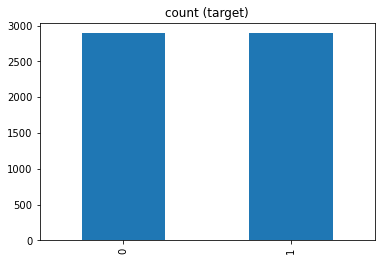

In [311]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and0:",test_under['y'].value_counts())# plot the count after under-sampeling
test_under['y'].value_counts().plot(kind='bar', title='count (target)')

In [312]:
features = test_under.drop('y', axis=1)
label = test_under['y']

In [313]:
# Define columns to be label encoded
columns_to_encode = ['marital', 'default', 'housing', 'loan', 'month', 'job', 'education']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_encode:
    encoder = LabelEncoder()
    features[col] = encoder.fit_transform(features[col])

In [314]:
from sklearn.preprocessing import StandardScaler
# Define columns to be label encoded

columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign']

# For each column, apply label encoding to the copied dataframe
for col in columns_to_scale:
    scaler = StandardScaler()
    features[col] = scaler.fit_transform(features[col].values.reshape(-1, 1))

In [315]:
features.drop(['default', 'loan'], axis=1, inplace=True)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    label, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [317]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [318]:
#F1 Score
from sklearn.metrics import f1_score, classification_report
print("Training Score is {} and Testing Score is {}".format(
    f1_score(y_train, model.predict(X_train)),
    f1_score(y_test, model.predict(X_test))
))

Training Score is 0.8865058087578195 and Testing Score is 0.8447528187337381


In [319]:
y_pred = model.predict(X_test)

In [320]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85       568
         Yes       0.87      0.83      0.84       590

    accuracy                           0.85      1158
   macro avg       0.85      0.85      0.85      1158
weighted avg       0.85      0.85      0.85      1158



In [321]:
confusion_matrix(y_test, y_pred)

array([[492,  76],
       [103, 487]])

In [322]:
# Feature importances
importances = model.feature_importances_
print("Feature importances:", importances)

Feature importances: [0.0498287  0.00626482 0.03421136 0.04133078 0.07232629 0.13959813
 0.6296243  0.00794913 0.01728031 0.00158618]


# IT WORKED!